C:\Users\nodoteve\AppData\Local\Temp\ipykernel_12144\744378223.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  a:DataFrame = df.pivot(y_name, x_name, "v")


a       2.100     2.121     2.142     2.163     2.184     2.205     2.226  \
b                                                                           
0.3  0.363742  0.370817  0.379026  0.385310  0.391814  0.398278  0.404119   
0.2  0.293615  0.296439  0.309910  0.308191  0.314351  0.320613  0.326385   
0.1  0.209811  0.218187  0.221080  0.218189  0.237144  0.245925  0.242401   

a       2.247     2.268     2.289     2.311     2.332     2.353     2.374  \
b                                                                           
0.3  0.409630  0.415900  0.421702  0.426272  0.431609  0.436390  0.441568   
0.2  0.331452  0.336509  0.341461  0.346525  0.351159  0.355594  0.360357   
0.1  0.247737  0.251334  0.259238  0.259936  0.265301  0.268886  0.273304   

a       2.395     2.416     2.437     2.458     2.479     2.500  
b                                                                
0.3  0.446390  0.451507  0.456048  0.460558  0.465896  0.470777  
0.2  0.364398  0.368884  0.373

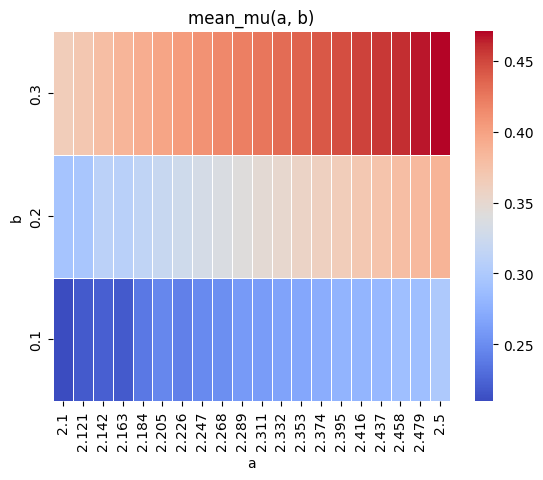

In [1]:
# Program to plot 2-D Heat map
# using seaborn.heatmap() method
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# rings1 - PEC rings simple lattice
# rings2 - copper rings simple lattice
# rings3 - copper rings 2 layer lattice with shift in direction of x axis

filename = "../rings_tetra3/rings_tetra3_test_mu(a,b)_wide.txt"
x_name = "a"
y_name = "b"

# data in the form of list of tuples
def get_and_apply_f(func):
    data_set = []
    with open(filename) as f:
        lines = f.readlines()
        for line_id in range(len(lines)):
            line = lines[line_id]
            if line[0] == "#":
                if line[1] == "P":

                    def read_param(name):
                        id = line.find(name + "=")
                        id_of_semicolon = line.find(";", id)
                        id_of_semicolon = (
                            id_of_semicolon if id_of_semicolon > 0 else len(line)
                        )
                        p = line[
                            id + len(name) + 1 : min(id_of_semicolon, line.find("}", id))
                        ]
                        return float(p)

                    x = read_param(x_name)
                    y = read_param(y_name)

                    # find avg of mu for all freq for given x, y
                    vals = []
                    for id in range(line_id + 1, len(lines)):
                        line = lines[id]
                        if line[0] == "#":
                            if line[1] == "P":
                                break
                        else:
                            tuple_of_vals = [float(x) for x in line.split()]
                            vals.append(tuple_of_vals[1])
                    data_set.append((x, y, func(vals)))
    return data_set

# reformat data for drawing
import pandas as pd
from pandas import DataFrame

# create DataFrame using data
def draw(data, name):
    df = pd.DataFrame(data, columns=[x_name, y_name, "v"])
    df[x_name]=df[x_name].round(3)
    df[y_name]=df[y_name].round(3)
    # print(df[x_name],df[y_name])
    a:DataFrame = df.pivot(y_name, x_name, "v")
    a = a.reindex(a.sort_values(by=y_name, ascending=False).index)

    print(a)
    ax = sns.heatmap(a, linewidth=0.5, cmap="coolwarm")

    title = name+"_mu(" + x_name + ", " + y_name + ")"
    plt.title(title)
    plt.savefig(filename.replace(".txt", "") +"_heatmap_"+title + ".png",bbox_inches='tight')
    plt.show()

draw(get_and_apply_f(np.mean), "mean")
# draw(get_and_apply_f(np.min),"min")
# draw(get_and_apply_f(np.max),"max")